In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.max_columns=None

In [2]:
df = pd.read_csv('final_features.csv')

In [3]:
df

,user_id,merchant_id,label,kind,gender,age_0,age_2,age_3,age_4,age_5,age_6,age_7,age_8,items_user,categories_user,merchants_user,brands_user,dates_user,action_types_user,periods_user,users_merchant,items_merchant,categories_merchant,brands_merchant,dates_merchant,action_types_merchant,periods_merchant,items_user_merchant,categories_user_merchant,brands_user_merchant,dates_user_merchant,action_types_user_merchant,periods_user_merchant,clicks_user,purchases_user,favourites_user,clicks_merchant,purchases_merchant,favourites_merchant,clicks_user_merchant,purchases_user_merchant,favourites_user_merchant,clicks_in_merchant_ratio_perspective,purchases_in_merchant_ratio_perspective,favourites_in_merchant_ratio_perspective,clicks_by_user_ratio_perspective,purchases_by_user_ratio_perspective,favourites_by_user_ratio_perspective,clicks_user_ratio,purchases_user_ratio,favourites_user_ratio,clicks_user_merchant_ratio,purchases_user_merchant_ratio,favourites_user_merchant_ratio,clicks_merchant_ratio,purchases_merchant_ratio,favorites_merchant_ratio,interval,clicks_user_period_max,purchases_user_period_max,favourites_user_period_max,clicks_user_period_mean,purchases_user_period_mean,favourites_user_period_mean,clicks_user_period_0,clicks_user_period_1,clicks_user_period_2,clicks_user_period_3,clicks_user_period_4,clicks_user_period_5,favourites_user_period_0,favourites_user_period_1,favourites_user_period_2,favourites_user_period_3,favourites_user_period_4,favourites_user_period_5,purchases_user_period_0,purchases_user_period_1,purchases_user_period_2,purchases_user_period_3,purchases_user_period_4,purchases_user_period_5,clicks_merchant_period_max,purchases_merchant_period_max,favourites_merchant_period_max,clicks_merchant_period_mean,purchases_merchant_period_mean,favourites_merchant_period_mean,clicks_merchant_period_0,clicks_merchant_period_1,clicks_merchant_period_2,clicks_merchant_period_3,clicks_merchant_period_4,clicks_merchant_period_5,favourites_merchant_period_0,favourites_merchant_period_1,favourites_merchant_period_2,favourites_merchant_period_3,favourites_merchant_period_4,favourites_merchant_period_5,purchases_merchant_period_0,purchases_merchant_period_1,purchases_merchant_period_2,purchases_merchant_period_3,purchases_merchant_period_4,purchases_merchant_period_5,clicks_user_merchant_period_0,clicks_user_merchant_period_1,clicks_user_merchant_period_2,clicks_user_merchant_period_3,clicks_user_merchant_period_4,clicks_user_merchant_period_5,favourites_user_merchant_period_0,favourites_user_merchant_period_1,favourites_user_merchant_period_2,favourites_user_merchant_period_3,favourites_user_merchant_period_4,favourites_user_merchant_period_5,purchases_user_merchant_period_0,purchases_user_merchant_period_1,purchases_user_merchant_period_2,purchases_user_merchant_period_3,purchases_user_merchant_period_4,purchases_user_merchant_period_5,double11_items_user,double11_categories_user,double11_merchants_user,double11_brands_user,double11_dates_user,double11_action_types_user,double11_periods_user,double11_users_merchant,double11_items_merchant,double11_categories_merchant,double11_brands_merchant,double11_dates_merchant,double11_action_types_merchant,double11_periods_merchant,double11_items_user_merchant,double11_categories_user_merchant,double11_brands_user_merchant,double11_dates_user_merchant,double11_action_types_user_merchant,double11_periods_user_merchant,double11_clicks_user,double11_purchases_user,double11_favourites_user,double11_clicks_merchant,double11_purchases_merchant,double11_favourites_merchant,double11_clicks_user_merchant,double11_purchases_user_merchant,double11_favourites_user_merchant
0,34944,2116,-1,train,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,227,1,1,1,39,3,3,1,1,1,1,1,1,1,0,0,310,13,11,1,0,0,1.0,0.0,0.0,0.003226,0.000000,0.000000,1.00,0.00,0.00,1.00,0.00,0.00,0.928144,0.038922,0.032934,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,285,10,11,103.333333,4.333333,3.666667,

In [21]:
df=df.fillna(0)

In [22]:
X = df.drop(['label','kind'],axis=1)

In [41]:
X

,user_id,merchant_id,gender,age_0,age_2,age_3,age_4,age_5,age_6,age_7,age_8,items_user,categories_user,merchants_user,brands_user,dates_user,action_types_user,periods_user,users_merchant,items_merchant,categories_merchant,brands_merchant,dates_merchant,action_types_merchant,periods_merchant,items_user_merchant,categories_user_merchant,brands_user_merchant,dates_user_merchant,action_types_user_merchant,periods_user_merchant,clicks_user,purchases_user,favourites_user,clicks_merchant,purchases_merchant,favourites_merchant,clicks_user_merchant,purchases_user_merchant,favourites_user_merchant,clicks_in_merchant_ratio_perspective,purchases_in_merchant_ratio_perspective,favourites_in_merchant_ratio_perspective,clicks_by_user_ratio_perspective,purchases_by_user_ratio_perspective,favourites_by_user_ratio_perspective,clicks_user_ratio,purchases_user_ratio,favourites_user_ratio,clicks_user_merchant_ratio,purchases_user_merchant_ratio,favourites_user_merchant_ratio,clicks_merchant_ratio,purchases_merchant_ratio,favorites_merchant_ratio,interval,clicks_user_period_max,purchases_user_period_max,favourites_user_period_max,clicks_user_period_mean,purchases_user_period_mean,favourites_user_period_mean,clicks_user_period_0,clicks_user_period_1,clicks_user_period_2,clicks_user_period_3,clicks_user_period_4,clicks_user_period_5,favourites_user_period_0,favourites_user_period_1,favourites_user_period_2,favourites_user_period_3,favourites_user_period_4,favourites_user_period_5,purchases_user_period_0,purchases_user_period_1,purchases_user_period_2,purchases_user_period_3,purchases_user_period_4,purchases_user_period_5,clicks_merchant_period_max,purchases_merchant_period_max,favourites_merchant_period_max,clicks_merchant_period_mean,purchases_merchant_period_mean,favourites_merchant_period_mean,clicks_merchant_period_0,clicks_merchant_period_1,clicks_merchant_period_2,clicks_merchant_period_3,clicks_merchant_period_4,clicks_merchant_period_5,favourites_merchant_period_0,favourites_merchant_period_1,favourites_merchant_period_2,favourites_merchant_period_3,favourites_merchant_period_4,favourites_merchant_period_5,purchases_merchant_period_0,purchases_merchant_period_1,purchases_merchant_period_2,purchases_merchant_period_3,purchases_merchant_period_4,purchases_merchant_period_5,clicks_user_merchant_period_0,clicks_user_merchant_period_1,clicks_user_merchant_period_2,clicks_user_merchant_period_3,clicks_user_merchant_period_4,clicks_user_merchant_period_5,favourites_user_merchant_period_0,favourites_user_merchant_period_1,favourites_user_merchant_period_2,favourites_user_merchant_period_3,favourites_user_merchant_period_4,favourites_user_merchant_period_5,purchases_user_merchant_period_0,purchases_user_merchant_period_1,purchases_user_merchant_period_2,purchases_user_merchant_period_3,purchases_user_merchant_period_4,purchases_user_merchant_period_5,double11_items_user,double11_categories_user,double11_merchants_user,double11_brands_user,double11_dates_user,double11_action_types_user,double11_periods_user,double11_users_merchant,double11_items_merchant,double11_categories_merchant,double11_brands_merchant,double11_dates_merchant,double11_action_types_merchant,double11_periods_merchant,double11_items_user_merchant,double11_categories_user_merchant,double11_brands_user_merchant,double11_dates_user_merchant,double11_action_types_user_merchant,double11_periods_user_merchant,double11_clicks_user,double11_purchases_user,double11_favourites_user,double11_clicks_merchant,double11_purchases_merchant,double11_favourites_merchant,double11_clicks_user_merchant,double11_purchases_user_merchant,double11_favourites_user_merchant
0,34944,2116,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,227,1,1,1,39,3,3,1,1,1,1,1,1,1,0,0,310,13,11,1,0,0,1.0,0.0,0.0,0.003226,0.000000,0.000000,1.00,0.00,0.00,1.00,0.00,0.00,0.928144,0.038922,0.032934,0,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,285,10,11,103.333333,4.333333,3.666667,0.0,0.0,0.0,1.0,24.0

In [23]:
y = df['label'] 

In [24]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

In [25]:
# Initialize a linear regression model
lr = LinearRegression()

In [26]:
# Initialize an RFECV object with the linear regression model
rfecv = RFECV(estimator=lr, step=1, cv=5, scoring='r2')

In [27]:
# Fit the RFECV object to the data
rfecv.fit(X, y)

RFECV(cv=5, estimator=LinearRegression(), scoring='r2')

In [28]:
print(f"Optimal number of features: {rfecv.n_features_}")
print(f"Ranking of features: {rfecv.ranking_}")

Optimal number of features: 148
Ranking of features: [2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 4 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf = RandomForestRegressor(n_estimators=100, random_state=0)

In [31]:
rf.fit(X, y)

RandomForestRegressor(random_state=0)

In [32]:
importances = rf.feature_importances_


In [43]:
feature_names = cols

In [33]:
indices = np.argsort(importances)[::-1]


In [44]:
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature '{feature_names[indices[f]]}' ({importances[indices[f]]})")

Feature ranking:
1. feature 'purchases_merchant_ratio' (0.1946531306173627)
2. feature 'user_id' (0.17586483986261328)
3. feature 'double11_purchases_user_merchant' (0.11077017098788941)
4. feature 'double11_brands_merchant' (0.04897044785397058)
5. feature 'merchant_id' (0.04665675830887109)
6. feature 'double11_purchases_user' (0.02927451931270214)
7. feature 'clicks_user_merchant_period_5' (0.02862537986226467)
8. feature 'gender' (0.02218116396547678)
9. feature 'clicks_user_period_5' (0.018693246258688605)
10. feature 'age_7' (0.017266471225074378)
11. feature 'age_4' (0.016274290474350646)
12. feature 'interval' (0.016110838622987234)
13. feature 'clicks_by_user_ratio_perspective' (0.015026954041946065)
14. feature 'clicks_user_period_mean' (0.014061482876708975)
15. feature 'age_2' (0.011113235468893479)
16. feature 'age_3' (0.009800696024143766)
17. feature 'age_0' (0.008131303111760201)
18. feature 'favourites_user_period_5' (0.007898532574764779)
19. feature 'age_5' (0.007759

In [42]:
cols=X.columns 

In [37]:
cols

Index(['user_id', 'merchant_id', 'label', 'kind', 'gender', 'age_0', 'age_2',
       'age_3', 'age_4', 'age_5',
       ...
       'double11_periods_user_merchant', 'double11_clicks_user',
       'double11_purchases_user', 'double11_favourites_user',
       'double11_clicks_merchant', 'double11_purchases_merchant',
       'double11_favourites_merchant', 'double11_clicks_user_merchant',
       'double11_purchases_user_merchant',
       'double11_favourites_user_merchant'],
      dtype='object', length=153)

In [45]:
df['purchases_user_ratio']

0       0.00
1       0.00
2       0.25
3       0.25
4       0.25
        ... 
9157    0.00
9158    0.00
9159    0.00
9160    0.00
9161    0.00
Name: purchases_user_ratio, Length: 9162, dtype: float64

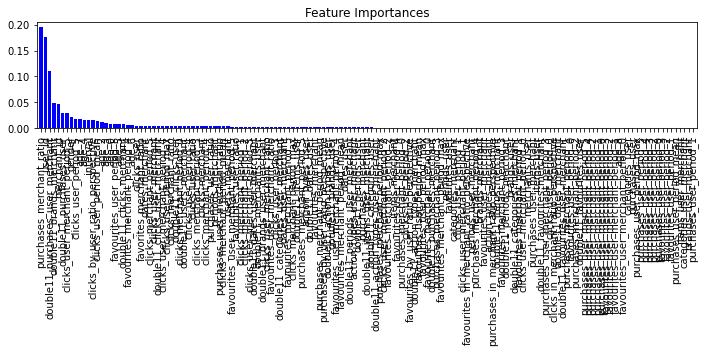

In [46]:
# Plot the feature importances
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

In [48]:
n_features = 30

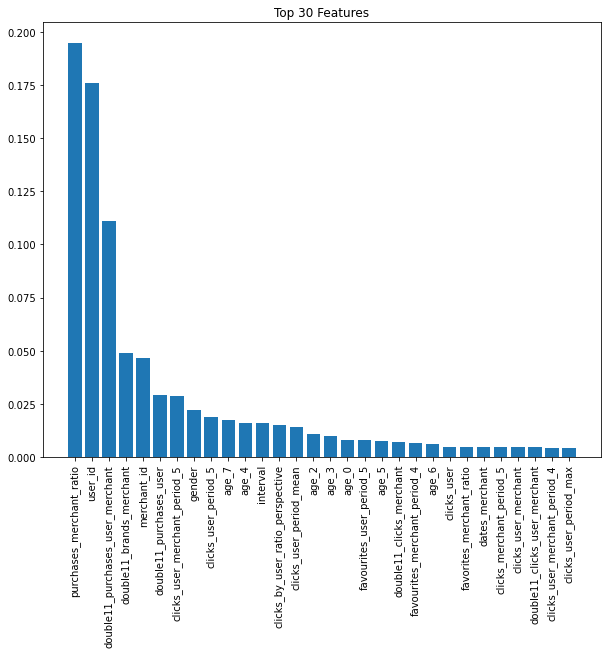

In [49]:
# Plot the top 30 features based on importance score
plt.figure(figsize=(10, 8))
plt.title(f"Top {n_features} Features")
plt.bar(range(n_features), importances[indices[:n_features]])
plt.xticks(range(n_features), feature_names[indices[:n_features]], rotation=90)
plt.show()